<h1>Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import pickle



<h1> Input Data

In [2]:
file_path = "kc_house_data.csv"
pd.set_option('display.float_format', '{:.3f}'.format)

data = pd.read_csv(file_path)
data = data.drop(columns=['id'])


print(data.head(10))
print(data.shape)


              date       price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  20141013T000000  221900.000         3      1.000         1180      5650   
1  20141209T000000  538000.000         3      2.250         2570      7242   
2  20150225T000000  180000.000         2      1.000          770     10000   
3  20141209T000000  604000.000         4      3.000         1960      5000   
4  20150218T000000  510000.000         3      2.000         1680      8080   
5  20140512T000000 1225000.000         4      4.500         5420    101930   
6  20140627T000000  257500.000         3      2.250         1715      6819   
7  20150115T000000  291850.000         3      1.500         1060      9711   
8  20150415T000000  229500.000         3      1.000         1780      7470   
9  20150312T000000  323000.000         3      2.500         1890      6560   

   floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
0   1.000           0     0          3      7        1180        

In [3]:
#extracting year from date
data['year'] = data['date'].str[:4].astype(int)
data.drop(columns=['date'], inplace=True)

#changing the value of yr_renovated
data['is_renovated'] = np.where(data['yr_renovated'] > 0, 1, 0)
data.drop(columns=['yr_renovated'], inplace=True)
print(data.head(10))

        price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.000         3      1.000         1180      5650   1.000           0   
1  538000.000         3      2.250         2570      7242   2.000           0   
2  180000.000         2      1.000          770     10000   1.000           0   
3  604000.000         4      3.000         1960      5000   1.000           0   
4  510000.000         3      2.000         1680      8080   1.000           0   
5 1225000.000         4      4.500         5420    101930   1.000           0   
6  257500.000         3      2.250         1715      6819   2.000           0   
7  291850.000         3      1.500         1060      9711   1.000           0   
8  229500.000         3      1.000         1780      7470   1.000           0   
9  323000.000         3      2.500         1890      6560   2.000           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  zipcode  \
0     0          3      7        

In [4]:
#split train val test
train_df, temp_df = train_test_split(data, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)
combined_df = pd.concat([train_df, val_df, test_df])

#reset index
train_df.reset_index(drop=True, inplace=True)
val_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

print(f"Train: {len(train_df)}, Validation: {len(val_df)}, Test: {len(test_df)}")

Train: 17290, Validation: 2161, Test: 2162


<h1> Data Exploration

In [5]:
summary = train_df.describe()
print(summary)

            price  bedrooms  bathrooms  sqft_living    sqft_lot    floors  \
count   17290.000 17290.000  17290.000    17290.000   17290.000 17290.000   
mean   537768.048     3.368      2.114     2073.895   14798.947     1.499   
std    361463.927     0.931      0.767      907.298   38839.249     0.543   
min     75000.000     0.000      0.000      290.000     520.000     1.000   
25%    320150.000     3.000      1.500     1430.000    5001.250     1.000   
50%    450000.000     3.000      2.250     1910.000    7600.000     1.500   
75%    640000.000     4.000      2.500     2540.000   10606.750     2.000   
max   7700000.000    33.000      8.000    12050.000 1164794.000     3.500   

       waterfront      view  condition     grade  sqft_above  sqft_basement  \
count   17290.000 17290.000  17290.000 17290.000   17290.000      17290.000   
mean        0.007     0.233      3.408     7.654    1785.962        287.933   
std         0.084     0.762      0.652     1.170     821.626        4

In [6]:
missing_values = combined_df.isnull().sum()

print(missing_values)
print(data.dtypes)

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
is_renovated     0
dtype: int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
year               int32
is_renovated       int32
dtype: object


<Figure size 1500x1000 with 0 Axes>

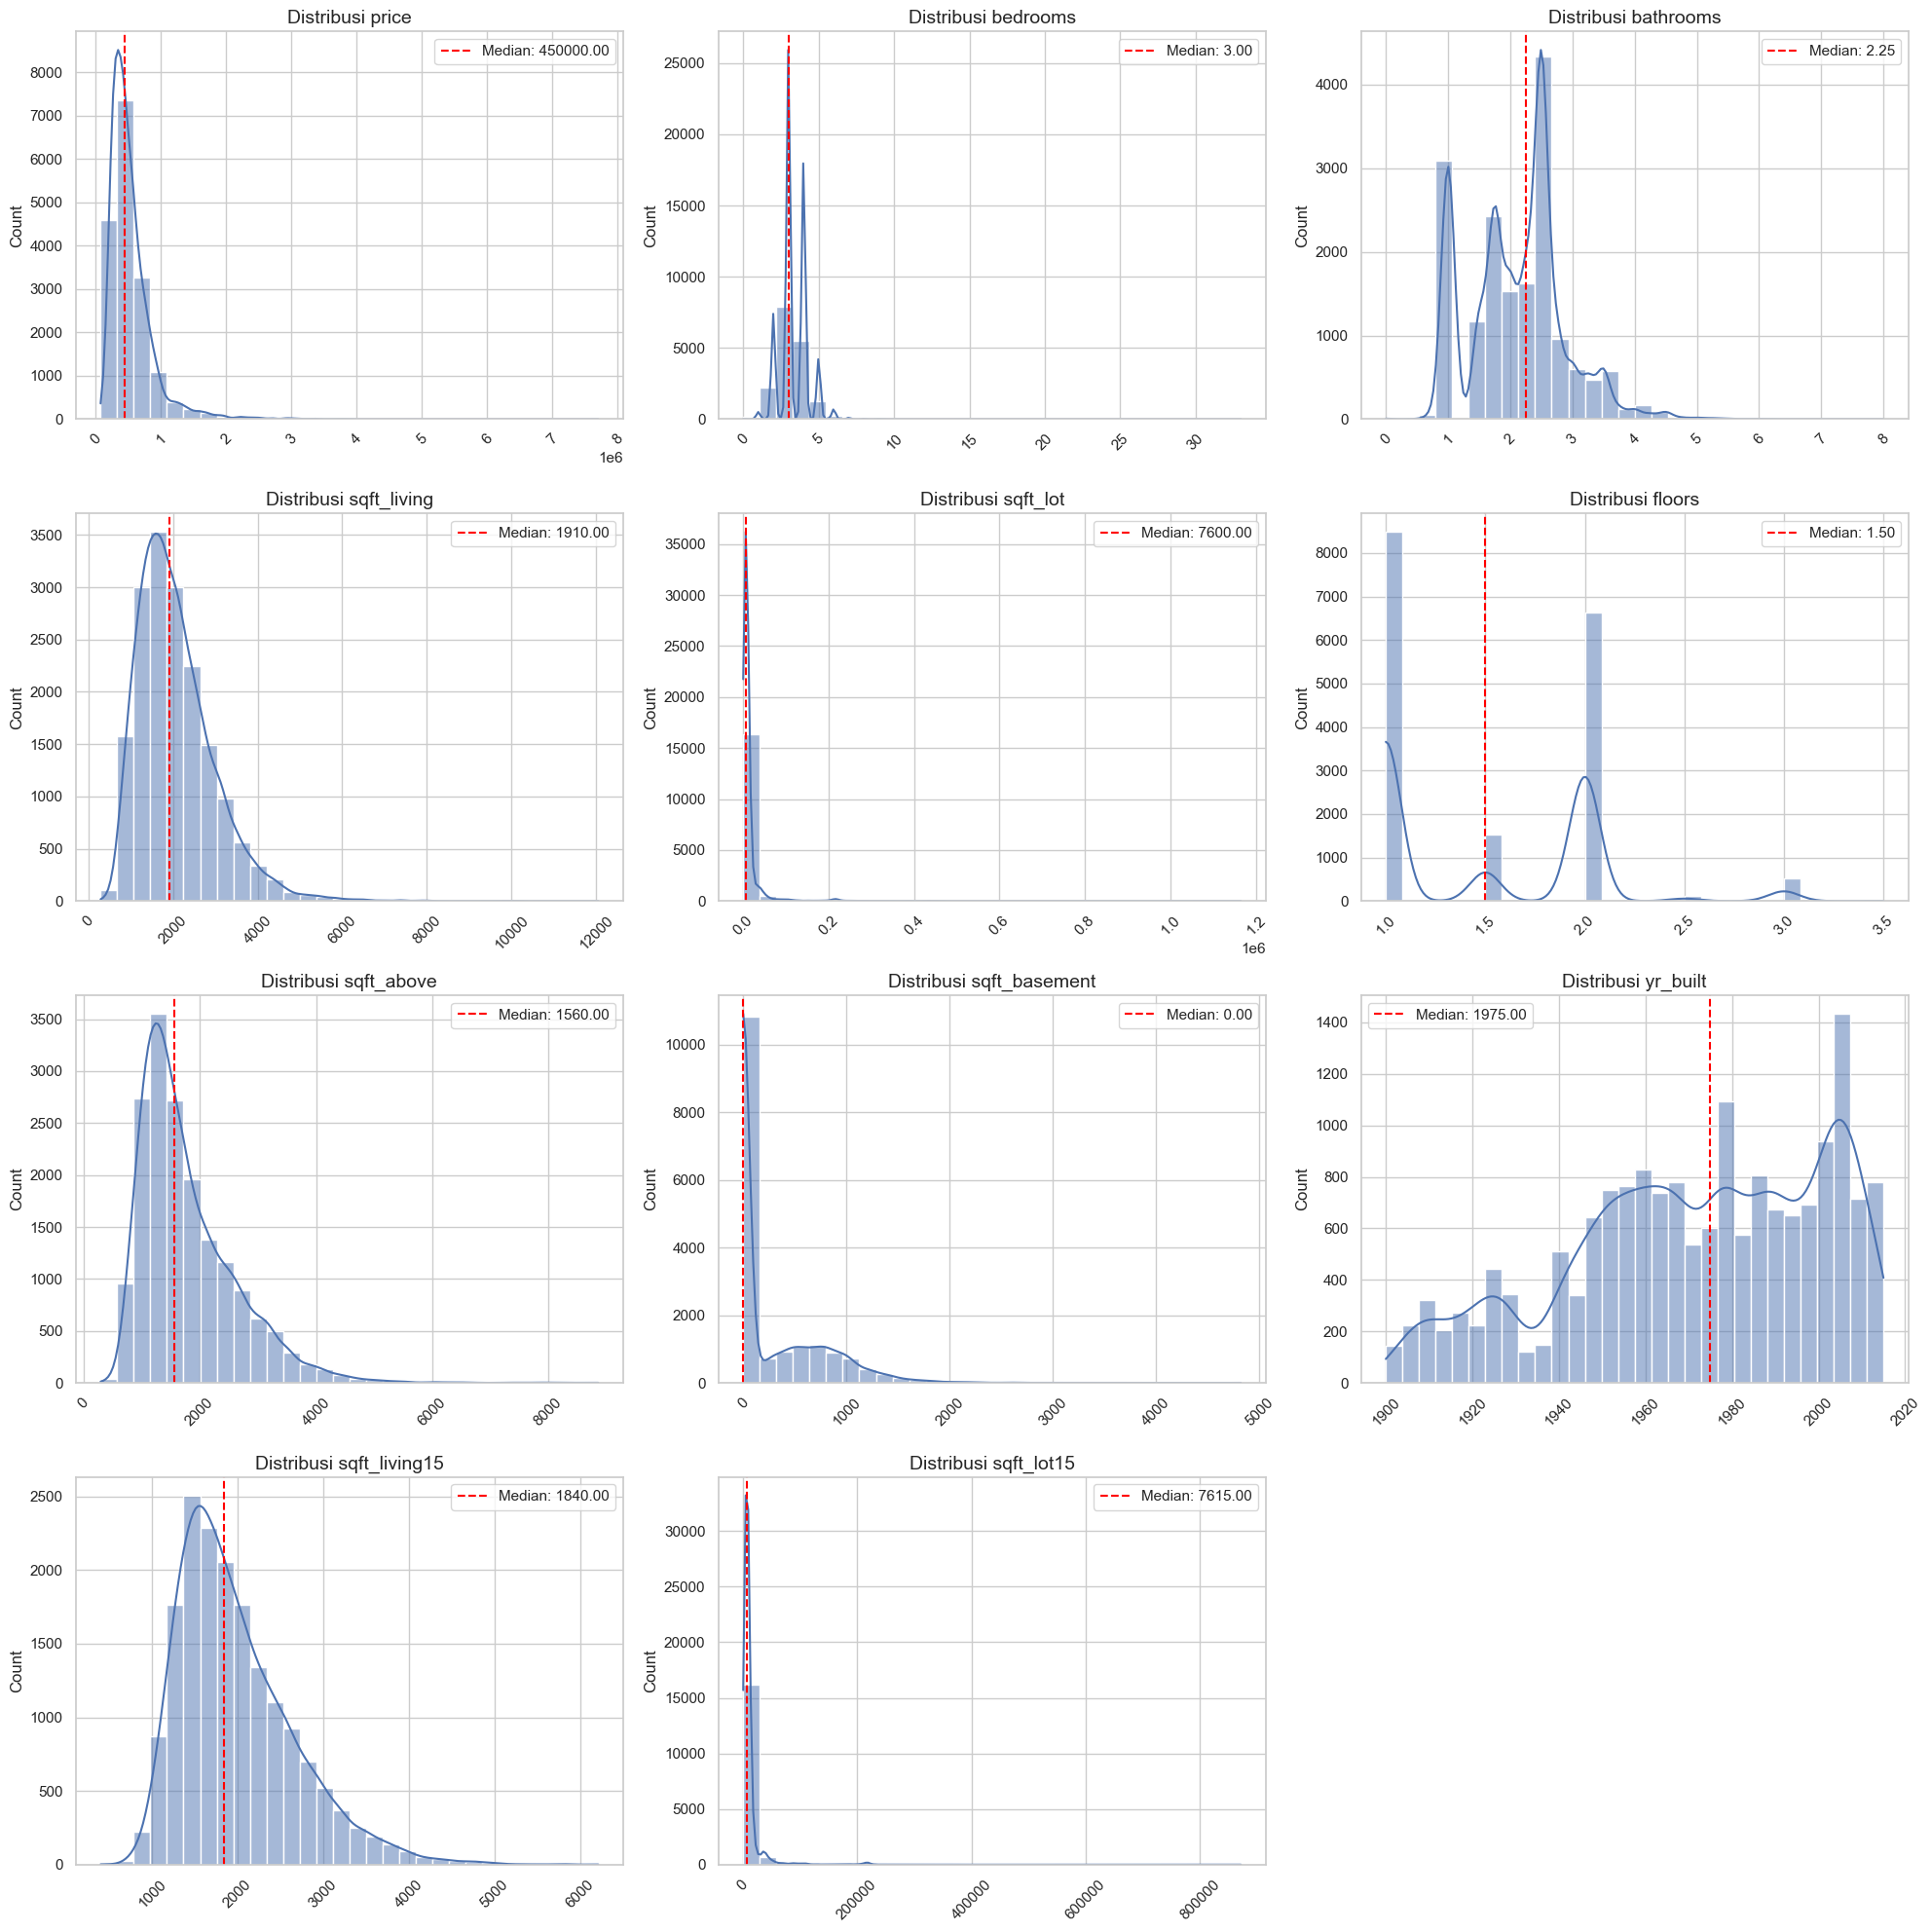

In [7]:
# Set style untuk visualisasi
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# List fitur numerik yang akan diplot
numerical_features = [
    'price', 'bedrooms', 'bathrooms', 'sqft_living', 
    'sqft_lot', 'floors', 'sqft_above', 'sqft_basement',
    'yr_built', 'sqft_living15', 'sqft_lot15'
]

# Membuat subplot grid
n_cols = 3
n_rows = np.ceil(len(numerical_features)/n_cols).astype(int)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten()  # Flatten untuk memudahkan iterasi

# Loop melalui setiap fitur numerik
for i, col in enumerate(numerical_features):
    ax = axes[i]
    
    # Plot histogram dengan KDE
    sns.histplot(data=train_df, x=col, bins=30, kde=True, ax=ax)
    
    # Menambahkan garis median
    median_val = train_df[col].median()
    ax.axvline(median_val, color='red', linestyle='--', 
               label=f'Median: {median_val:.2f}')
    
    # Formatting
    ax.set_title(f'Distribusi {col}', fontsize=14)
    ax.set_xlabel('')
    ax.legend()
    
    # Rotasi label x jika diperlukan
    plt.setp(ax.get_xticklabels(), rotation=45)

# Menyembunyikan axes yang tidak terpakai
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

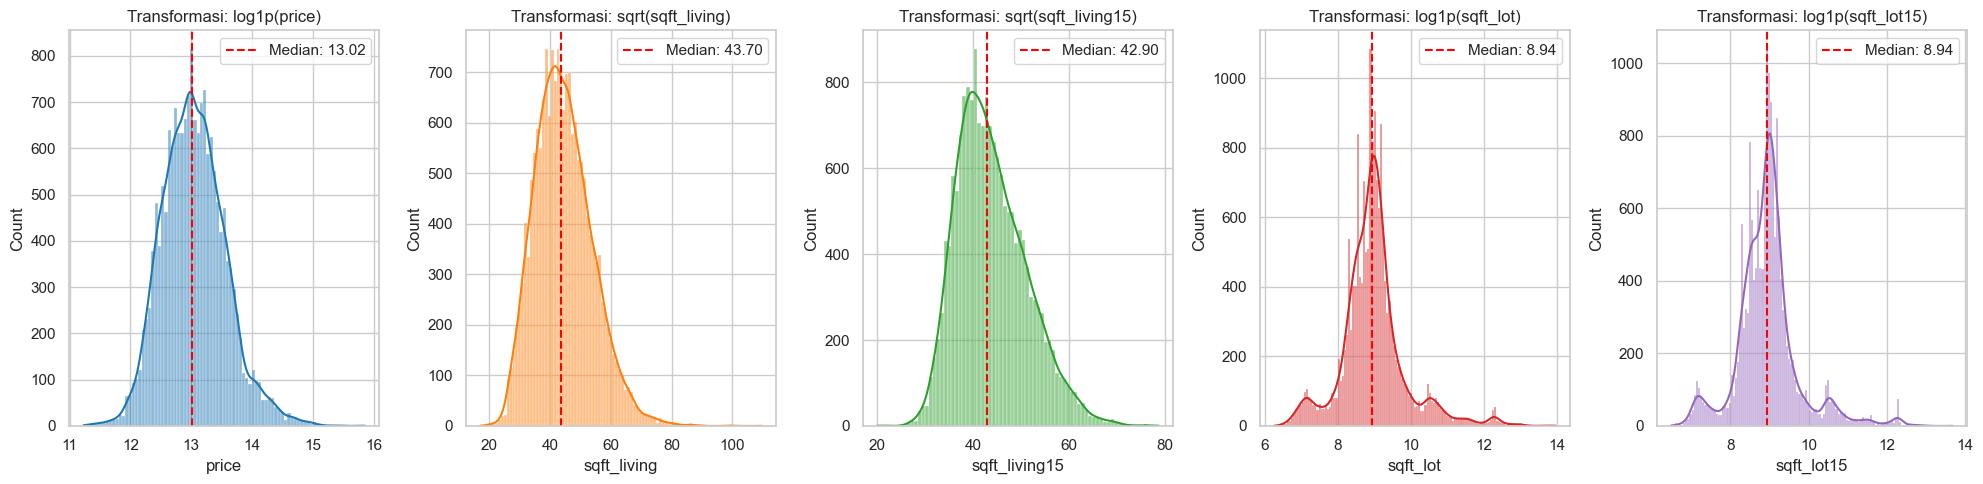

In [8]:
train_transforms = {
    'price': np.log1p,
    'sqft_living': np.sqrt,
    'sqft_living15': np.sqrt,
    'sqft_lot': np.log1p,
    'sqft_lot15': np.log1p
}

# Visualisasi setelah transformasi (hanya untuk train)
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, len(train_transforms), figsize=(20, 5))

for i, (col, func) in enumerate(train_transforms.items()):
    # Transformasi dan timpa kolom aslinya di train
    train_df[col] = func(train_df[col])

    # Visualisasi hasil transformasi
    ax = axes[i]
    sns.histplot(train_df[col], kde=True, ax=ax, color=plt.cm.tab10(i))
    median_val = train_df[col].median()
    ax.axvline(median_val, color='red', linestyle='--', label=f'Median: {median_val:.2f}')
    ax.set_title(f'Transformasi: {func.__name__}({col})', fontsize=12)
    ax.set_xlabel(col)
    ax.legend()

plt.tight_layout()
plt.show()

In [9]:
print(train_df.head(10))

   price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0 12.692         3      1.750       42.190     9.480   1.000           0   
1 12.457         2      1.000       31.623     8.216   1.000           0   
2 12.339         3      1.000       32.863     8.921   1.500           0   
3 12.571         3      2.250       45.717     8.923   1.000           0   
4 13.079         2      2.500       41.725     7.272   2.000           0   
5 13.039         3      1.750       48.374    10.856   1.500           0   
6 13.016         5      2.750       45.166     8.921   1.000           0   
7 13.553         5      2.250       57.619     9.483   1.000           0   
8 13.430         3      1.750       41.952     9.036   1.000           0   
9 12.590         3      2.500       40.125     8.522   2.000           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  zipcode  \
0     0          4      9        1780              0      1983    98042   
1     0      

In [10]:
for col, func in train_transforms.items():
    val_df[col] = func(val_df[col])
    test_df[col] = func(test_df[col])

print(val_df.head(10))
print(test_df.head(10))

   price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0 12.897         2      1.000       28.107     8.294   1.000           0   
1 14.093         3      2.750       51.769     9.909   1.000           0   
2 13.180         2      1.000       30.000     8.477   1.000           0   
3 12.861         3      1.750       42.426     9.798   1.000           0   
4 12.852         4      2.500       49.295     8.623   2.000           0   
5 13.199         3      2.500       46.690     9.315   1.000           0   
6 12.278         3      2.500       36.359     8.701   2.000           0   
7 13.629         5      3.500       60.828     8.594   2.000           0   
8 13.056         3      2.000       39.623     8.748   1.000           0   
9 13.385         4      1.500       49.800     8.762   1.000           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  zipcode  \
0     0          3      6         790              0      1948    98115   
1     0      

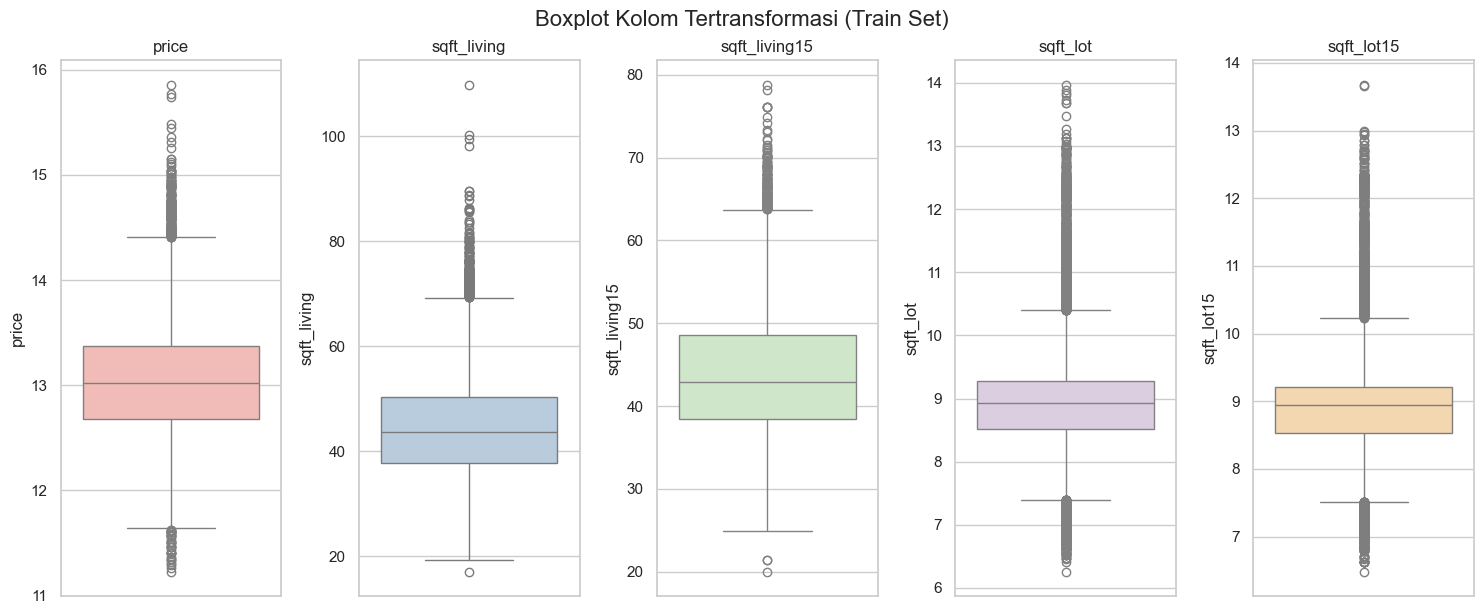

In [11]:
# Pilih kolom-kolom yang sudah ditransformasi
cols_to_plot = ['price', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15']

# Buat subplots boxplot untuk tiap kolom
plt.figure(figsize=(15, 6))
for i, col in enumerate(cols_to_plot):
    plt.subplot(1, len(cols_to_plot), i+1)
    sns.boxplot(y=train_df[col], color=plt.cm.Pastel1(i))
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Boxplot Kolom Tertransformasi (Train Set)", y=1.02, fontsize=16)
plt.show()

In [12]:
# Ambil 5 baris teratas berdasarkan price
top_5_price = train_df.sort_values(by='price', ascending=False).head(5).copy()

# Tambahkan kolom harga asli (sebelum log transform)
top_5_price['original_price'] = np.expm1(top_5_price['price'])

# Atur lebar kolom agar tidak terpotong (jika di Jupyter)
pd.set_option('display.max_columns', None)  # tampilkan semua kolom
pd.set_option('display.width', 1000)        # atur lebar tampilan

# Tampilkan hasil
display(top_5_price)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,year,is_renovated,original_price
6043,15.857,6,8.000,109.772,10.226,2.500,0,3,4,13,8570,3480,1910,98102,47.630,-122.323,62.769,9.083,2014,1,7700000.000
2580,15.770,5,4.500,100.200,10.527,2.000,1,2,3,11,7680,2360,1940,98004,47.650,-122.214,62.690,10.144,2014,1,7062500.000
3196,15.745,6,7.750,99.448,10.354,2.000,0,4,3,13,8860,1030,2001,98039,47.630,-122.240,67.380,10.663,2014,0,6885000.000
716,15.483,6,6.000,85.965,10.120,2.000,1,4,4,12,5000,2390,1991,98040,47.563,-122.210,65.727,10.111,2015,0,5300000.000
10345,15.447,5,5.250,89.499,10.726,2.000,1,4,3,12,5990,2020,1999,98033,47.677,-122.211,58.566,10.196,2014,0,5110800.000


In [13]:
# Menghitung IQR dan mendeteksi outlier
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    # Buat salinan DataFrame hanya dengan outlier
    outlier_df = outliers[[column]].copy()
    
    # Tambahkan kolom dengan nilai aslinya
    outlier_df['Original_Value'] = np.expm1(outlier_df[column])  # Reverse log transform
    
    return outlier_df

# Cek outlier untuk 'sqft_lot_log'
outliers_lot_log = detect_outliers_iqr(train_df, 'sqft_lot')

# Tampilkan hasil
print("Outlier untuk Log lot_log dengan nilai aslinya:")
print(outliers_lot_log)


Outlier untuk Log lot_log dengan nilai aslinya:
       sqft_lot  Original_Value
4         7.272        1439.000
5        10.856       51836.000
15        7.120        1235.000
17       10.523       37169.000
49       11.974      158558.000
...         ...             ...
17257     7.018        1115.000
17260     7.386        1612.000
17268     7.148        1270.000
17272    10.485       35782.000
17281    10.568       38869.000

[2057 rows x 2 columns]


In [14]:
data.loc[[5, 21, 27, 31, 36]]  # contoh index dari outlier


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,year,is_renovated
5,1225000.000,4,4.500,5420,101930,1.000,0,0,3,11,3890,1530,2001,98053,47.656,-122.005,4760,101930,2014,0
21,2000000.000,3,2.750,3050,44867,1.000,0,4,3,9,2330,720,1968,98040,47.532,-122.233,4110,20336,2014,0
27,667000.000,3,1.000,1400,1581,1.500,0,0,5,8,1400,0,1909,98112,47.622,-122.314,1860,3861,2014,0
31,280000.000,2,1.500,1190,1265,3.000,0,0,3,7,1190,0,2005,98133,47.727,-122.357,1390,1756,2014,0
36,550000.000,4,1.000,1660,34848,1.000,0,0,1,5,930,730,1933,98052,47.662,-122.132,2160,11467,2014,0


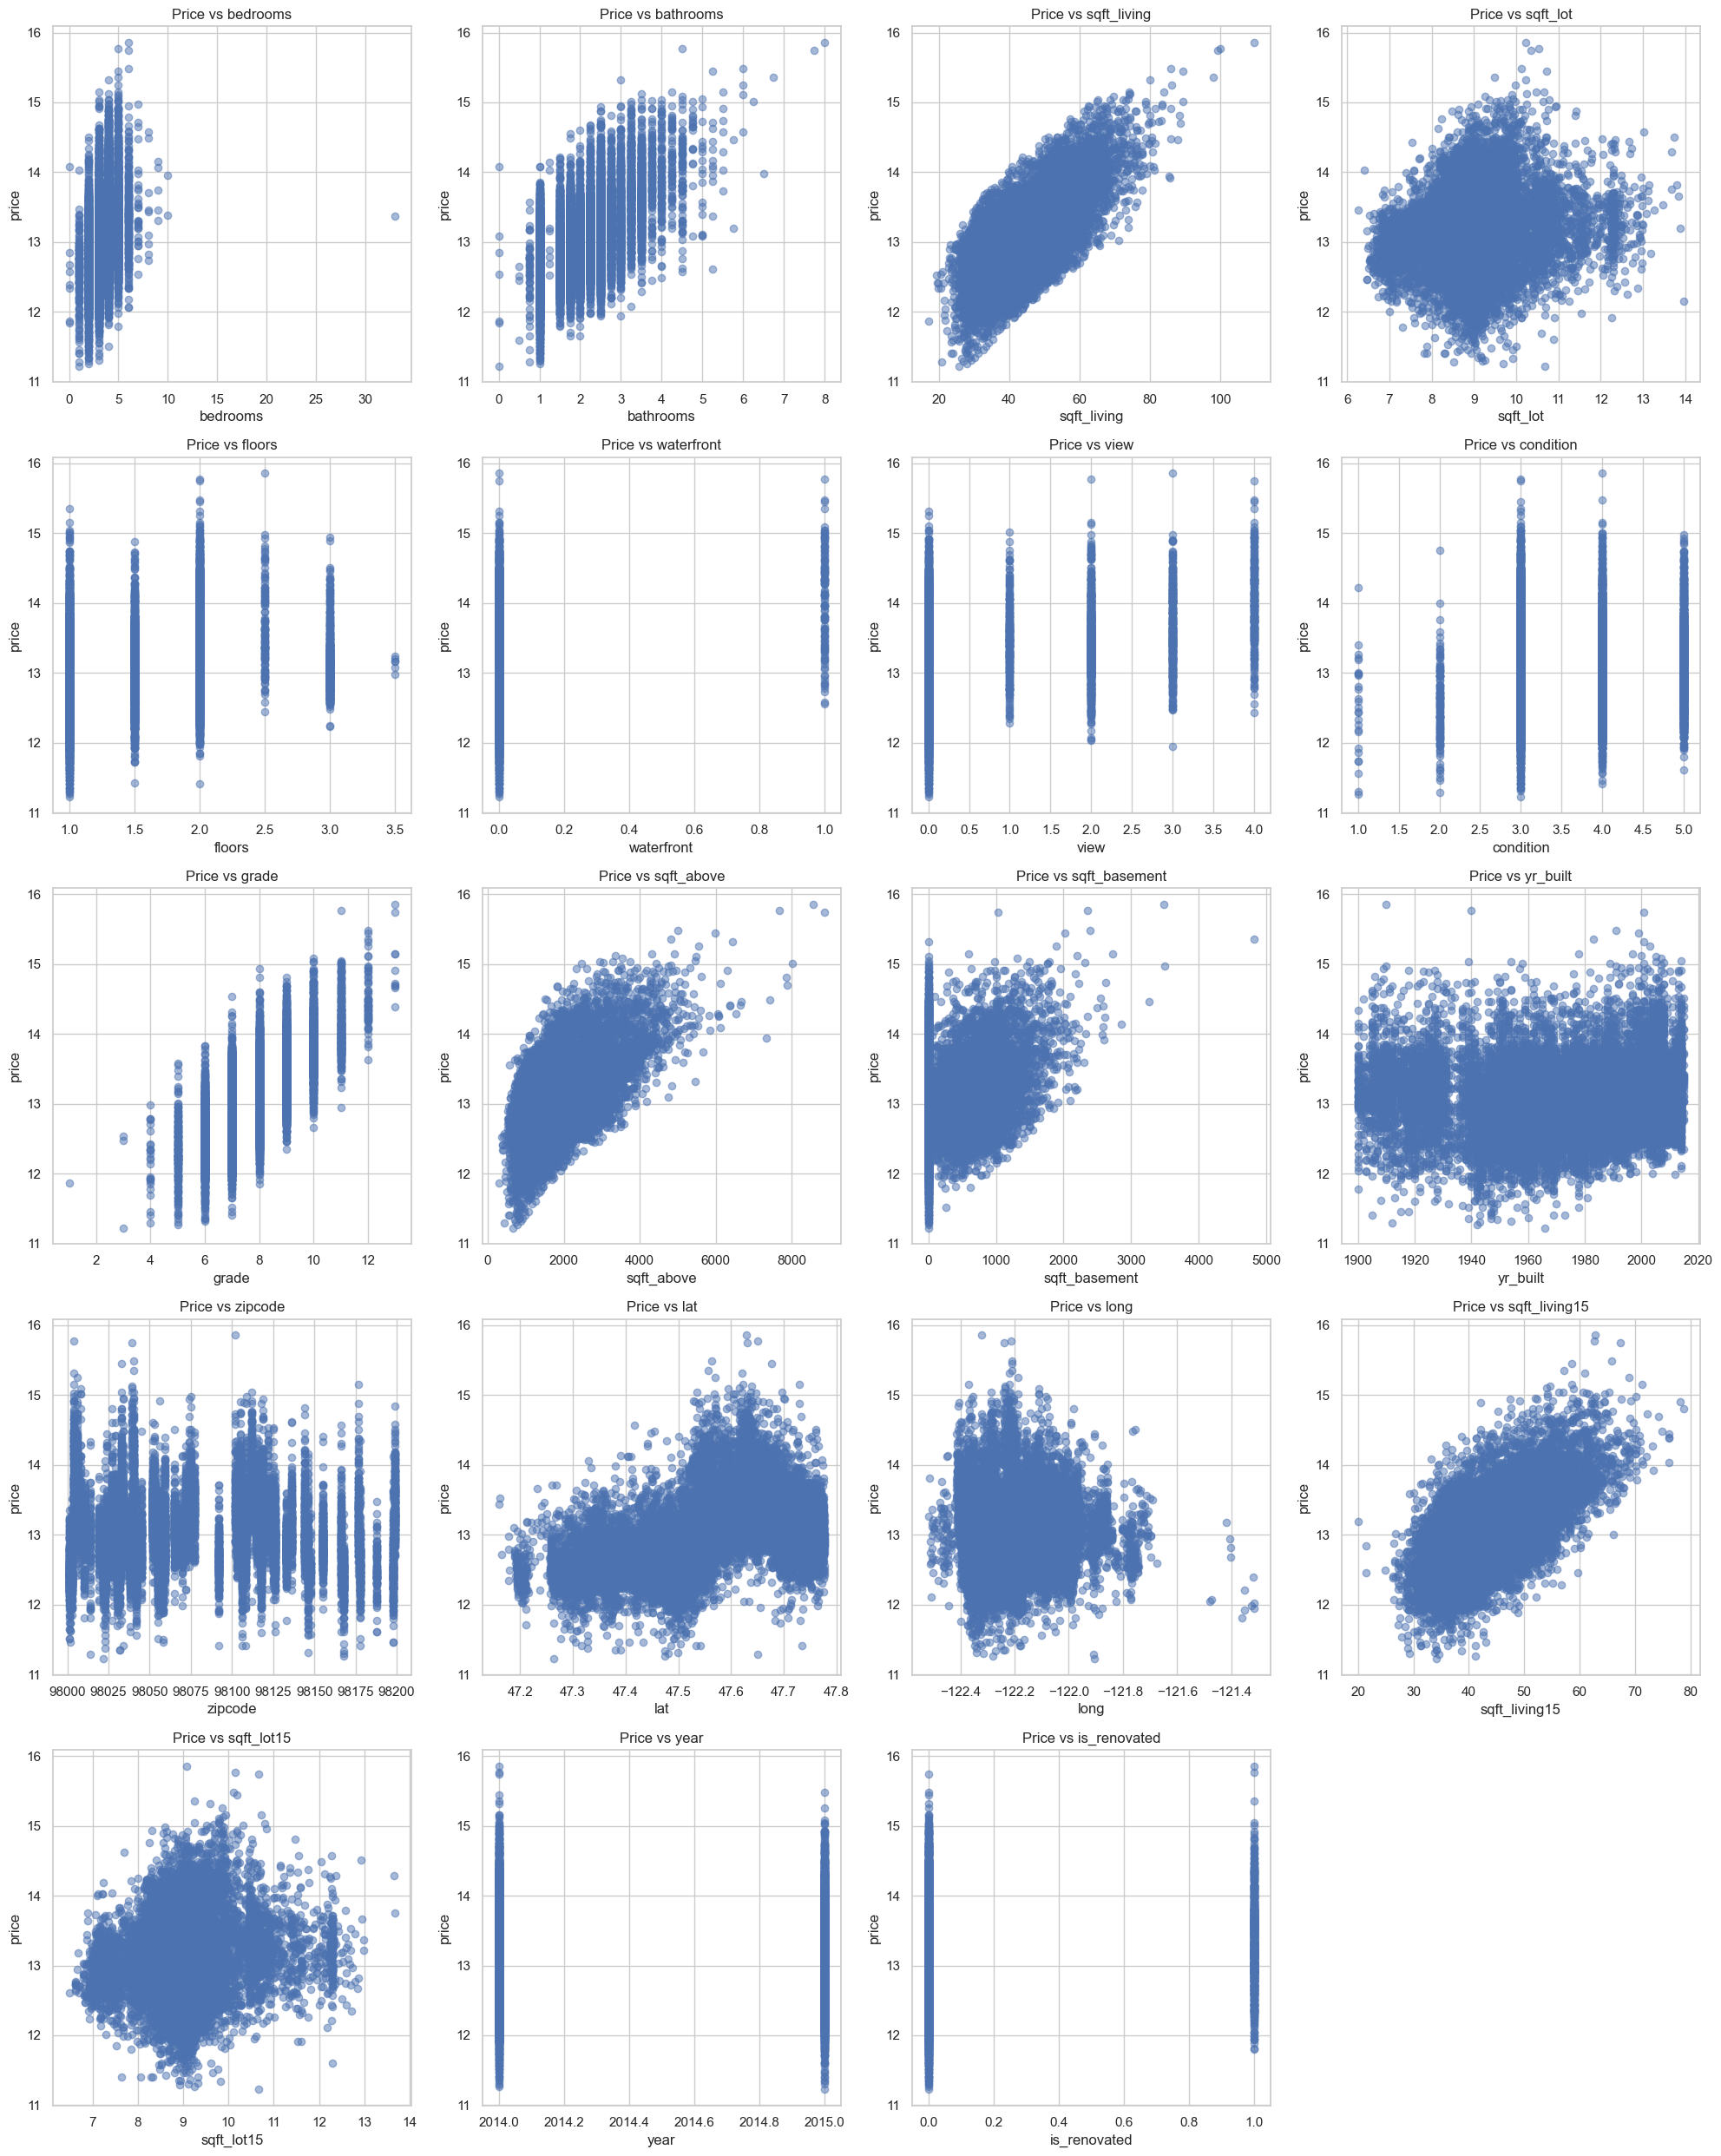

In [15]:
#Correlation by feature
features = [col for col in train_df.columns if col != 'price']

# Atur ukuran grid plot
n_cols = 4
n_rows = (len(features) + n_cols - 1) // n_cols
plt.figure(figsize=(20, 5 * n_rows))

# Loop untuk setiap fitur
for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.scatter(train_df[feature], train_df['price'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(f'Price vs {feature}')

plt.tight_layout()
plt.show()

In [16]:
# Menghitung korelasi Pearson dan Spearman
pearson_corr = train_df.corr(method='pearson')['price'].sort_values(ascending=False)
spearman_corr = train_df.corr(method='spearman')['price'].sort_values(ascending=False)

# Menggabungkan hasil dalam satu tabel
correlation_df = pd.DataFrame({
    'Pearson': pearson_corr,
    'Spearman': spearman_corr
})

# Menampilkan hasil korelasi (kecuali 'price' itu sendiri)
correlation_df = correlation_df.drop('price')
print(correlation_df)

               Pearson  Spearman
bathrooms        0.551     0.497
bedrooms         0.342     0.344
condition        0.039     0.018
floors           0.307     0.320
grade            0.700     0.654
is_renovated     0.115     0.102
lat              0.453     0.461
long             0.051     0.063
sqft_above       0.598     0.537
sqft_basement    0.316     0.255
sqft_living      0.691     0.641
sqft_living15    0.613     0.569
sqft_lot         0.134     0.071
sqft_lot15       0.119     0.059
view             0.342     0.292
waterfront       0.165     0.109
year             0.012     0.011
yr_built         0.077     0.098
zipcode         -0.038    -0.009


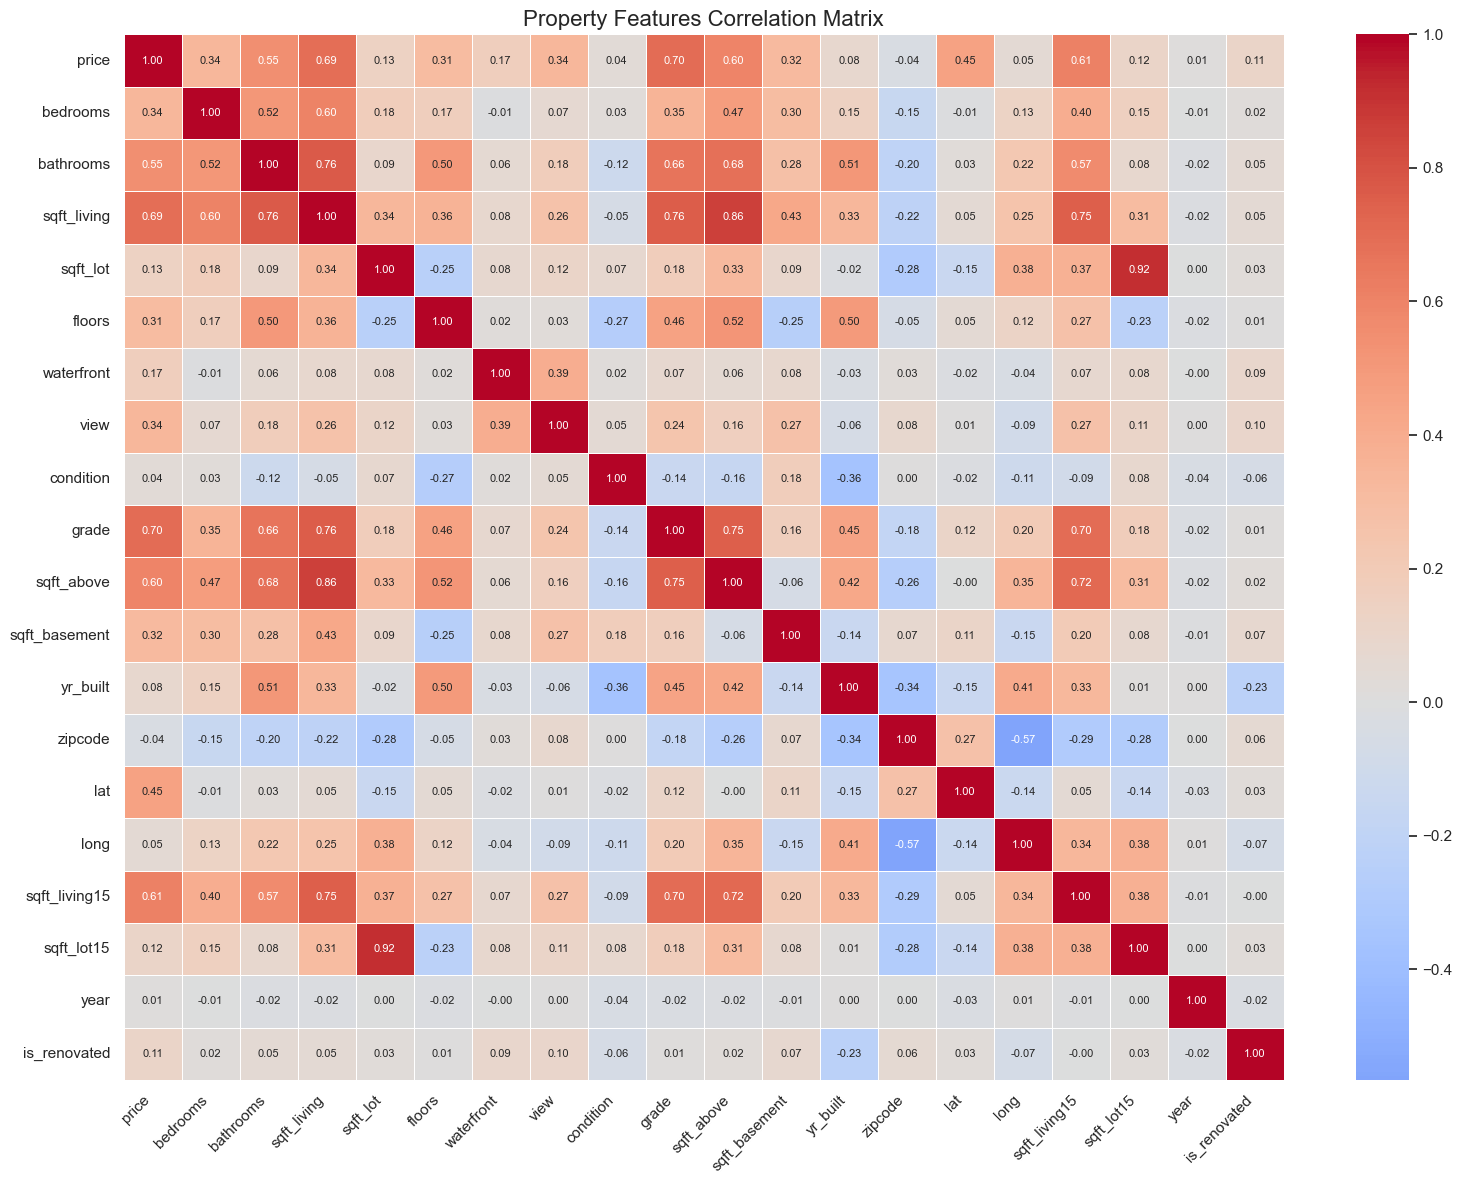

In [17]:
# 2. Seleksi Kolom Numerik
numeric_cols = train_df.select_dtypes(include=[np.number]).columns
df_numeric = train_df[numeric_cols]

# 3. Hitung Correlation Matrix
corr_matrix = df_numeric.corr()

# 5. Visualisasi Heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm',
            center=0,
            annot_kws={"size": 8},
            linewidths=0.5)

plt.title("Property Features Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<h1>Feature Engineering

In [18]:

# Fungsi untuk membuat fitur baru (tanpa dependensi statistik global)
def create_features(df):
    df = df.copy()
    # Fitur yang hanya bergantung pada nilai per baris
    df['luxury_score'] = (df['grade'] * 0.7) + (df['view'] * 0.3)
    df['bed_bath_ratio'] = df['bedrooms'] / (df['bathrooms'] + 1e-6)
    df['basement_percentage'] = df['sqft_basement'] / df['sqft_living']
    df['property_age'] = df['year'] - df['yr_built']
    df['total_rooms'] = df['bedrooms'] + df['bathrooms']
    return df

# 1. Hitung statistik HANYA dari train_df
# --------------------------------------------------
# Pusat geografis (gunakan mean dari train atau nilai tetap)
center_lat, center_long = 47.5, -122.3  # atau train_df[['lat', 'long']].mean()

# Hitung rata-rata harga per zipcode dari train_df
zipcode_price_means = train_df.groupby('zipcode')['price'].mean()

# Hitung bin edges untuk kategori tier (hanya dari train_df)
tier_bins = pd.qcut(zipcode_price_means, q=3, retbins=True, labels=['low', 'medium', 'high'])[1]

# 2. Terapkan fitur ke train_df
# --------------------------------------------------
train_df = create_features(train_df)
train_df['distance_from_center'] = np.sqrt((train_df['lat'] - center_lat)**2 + (train_df['long'] - center_long)**2)

# Kategorikan zipcode_price_tier untuk train_df
train_df['zipcode_price_mean'] = train_df['zipcode'].map(zipcode_price_means)
train_df['zipcode_price_tier'] = pd.cut(
    train_df['zipcode_price_mean'],
    bins=tier_bins,
    labels=['low', 'medium', 'high'],
    include_lowest=True
)
train_df.drop('zipcode_price_mean', axis=1, inplace=True)

# 3. Terapkan fitur ke test_df dan val_df DENGAN STATISTIK TRAIN
# --------------------------------------------------
def apply_features_with_train_stats(df, zipcode_price_means, tier_bins, center_lat, center_long):
    df = create_features(df)
    df['distance_from_center'] = np.sqrt((df['lat'] - center_lat)**2 + (df['long'] - center_long)**2)
    
    # Handle zipcode yang tidak ada di training
    df['zipcode_price_mean'] = df['zipcode'].map(zipcode_price_means)
    df['zipcode_price_tier'] = pd.cut(
        df['zipcode_price_mean'],
        bins=tier_bins,
        labels=['low', 'medium', 'high'],
        include_lowest=True
    )
    
    # Isi nilai default untuk zipcode yang tidak ada di train
    df['zipcode_price_tier'] = df['zipcode_price_tier'].fillna('low')
    df.drop('zipcode_price_mean', axis=1, inplace=True)
    return df

test_df = apply_features_with_train_stats(test_df, zipcode_price_means, tier_bins, center_lat, center_long)
val_df = apply_features_with_train_stats(val_df, zipcode_price_means, tier_bins, center_lat, center_long)

# 4. Validasi
# --------------------------------------------------
print("Train zipcode tiers:", train_df['zipcode_price_tier'].value_counts())
print("\nTest zipcode tiers:", test_df['zipcode_price_tier'].value_counts())
print("\nVal zipcode tiers:", val_df['zipcode_price_tier'].value_counts())

# Cek missing values
print("\nMissing values in test_df:", test_df.isnull().sum().sum())

Train zipcode tiers: zipcode_price_tier
low       5884
medium    5788
high      5618
Name: count, dtype: int64

Test zipcode tiers: zipcode_price_tier
low       735
medium    722
high      705
Name: count, dtype: int64

Val zipcode tiers: zipcode_price_tier
medium    748
low       737
high      676
Name: count, dtype: int64

Missing values in test_df: 0


In [19]:
print(train_df.head(10))

   price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  zipcode    lat     long  sqft_living15  sqft_lot15  year  is_renovated  luxury_score  bed_bath_ratio  basement_percentage  property_age  total_rooms  distance_from_center zipcode_price_tier
0 12.692         3      1.750       42.190     9.480   1.000           0     0          4      9        1780              0      1983    98042 47.367 -122.152         52.440       9.480  2014             0         6.300           1.714                0.000            31        4.750                 0.199                low
1 12.457         2      1.000       31.623     8.216   1.000           0     0          3      6         800            200      1929    98118 47.552 -122.290         35.637       8.517  2015             0         4.200           2.000                6.325            86        3.000                 0.053                low
2 12.339         3      1

In [20]:
#Encoding for zipcode price tier

# Definisikan urutan tier
tier_order = [['low', 'medium', 'high']]

# Inisialisasi encoder
encoder = OrdinalEncoder(categories=tier_order)

# Terapkan ke ketiga dataset
train_df['zipcode_price_tier'] = encoder.fit_transform(train_df[['zipcode_price_tier']])
val_df['zipcode_price_tier'] = encoder.transform(val_df[['zipcode_price_tier']])
test_df['zipcode_price_tier'] = encoder.transform(test_df[['zipcode_price_tier']])


<h1>SHAP (Feature importance counter)

In [21]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import shap

# Define a helper to compute mean absolute SHAP values for a model
def compute_shap_importance(model, X, model_name):
    explainer = shap.Explainer(model, X)
    shap_values = explainer(X)
    shap_df = pd.DataFrame({
        'feature': X.columns,
        f'shap_{model_name}': np.abs(shap_values.values).mean(axis=0)
    })
    return shap_df

# Define dataset inputs
exclude_cols = ['price']
feature_cols = [col for col in train_df.columns if col not in exclude_cols and train_df[col].dtype != 'object']

X_train = train_df[feature_cols]
y_train = train_df['price']

# Train models
xgb = XGBRegressor(n_estimators=100, max_depth=4, random_state=42)
lgb = LGBMRegressor(n_estimators=100, max_depth=4, random_state=42)
cat = CatBoostRegressor(n_estimators=100, depth=4, random_state=42, verbose=0)

xgb.fit(X_train, y_train)
lgb.fit(X_train, y_train)
cat.fit(X_train, y_train)

# Compute SHAP importances
shap_xgb = compute_shap_importance(xgb, X_train, "xgb")
shap_lgb = compute_shap_importance(lgb, X_train, "lgb")
shap_cat = compute_shap_importance(cat, X_train, "cat")

# Merge all SHAP importance into a single DataFrame
shap_all = shap_xgb.merge(shap_lgb, on="feature").merge(shap_cat, on="feature")
shap_all["mean_shap"] = shap_all[[f"shap_xgb", f"shap_lgb", f"shap_cat"]].mean(axis=1)

# Determine low-importance features (e.g. mean SHAP < 0.01 on all models)
shap_all["low_all"] = (
    (shap_all["shap_xgb"] < 0.01) &
    (shap_all["shap_lgb"] < 0.01) &
    (shap_all["shap_cat"] < 0.01)
)

# Urutkan untuk ditampilkan
shap_all = shap_all.sort_values(by="mean_shap", ascending=False).reset_index(drop=True)

# Tampilkan tabel interaktif rapi di Jupyter
shap_all.style.background_gradient(cmap="YlGnBu").format({
    'shap_xgb': '{:.4f}',
    'shap_lgb': '{:.4f}',
    'shap_cat': '{:.4f}',
    'mean_shap': '{:.4f}'
})


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001847 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3097
[LightGBM] [Info] Number of data points in the train set: 17290, number of used features: 26
[LightGBM] [Info] Start training from score 13.045168
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

 98%|===================| 16994/17290 [00:23<00:00]        

,feature,shap_xgb,shap_lgb,shap_cat,mean_shap,low_all
0,lat,0.1767,0.1583,0.1766,0.1705,False
1,sqft_living,0.1218,0.1271,0.1227,0.1239,False
2,luxury_score,0.0947,0.1143,0.0642,0.0911,False
3,zipcode_price_tier,0.0879,0.0929,0.0918,0.0909,False
4,distance_from_center,0.0576,0.0426,0.0658,0.0553,False
5,sqft_living15,0.0352,0.0342,0.0379,0.0357,False
6,sqft_lot,0.0391,0.0187,0.0397,0.0325,False
7,long,0.0304,0.0260,0.0336,0.0300,False
8,condition,0.0264,0.0210,0.0279,0.0251,False
9,year,0.0222,0.0185,0.0212,0.0206,False


In [22]:
# 1. Ambil daftar fitur yang ingin dihapus
features_to_drop = shap_all[shap_all["low_all"] == True]["feature"].tolist()

# 2. Drop fitur tersebut dari semua split data
train_df_cleaned = train_df.drop(columns=features_to_drop, errors='ignore')
val_df_cleaned = val_df.drop(columns=features_to_drop, errors='ignore')
test_df_cleaned = test_df.drop(columns=features_to_drop, errors='ignore')

# 3. Optional: Cetak konfirmasi
print("✅ Fitur yang dihapus:", features_to_drop)
print("Train shape:", train_df_cleaned.shape)
print("Val shape:", val_df_cleaned.shape)
print("Test shape:", test_df_cleaned.shape)

✅ Fitur yang dihapus: ['waterfront', 'basement_percentage', 'sqft_lot15', 'floors', 'bathrooms', 'total_rooms', 'is_renovated', 'view', 'bedrooms']
Train shape: (17290, 18)
Val shape: (2161, 18)
Test shape: (2162, 18)


In [23]:
print(train_df_cleaned.head(10))

   price  sqft_living  sqft_lot  condition  grade  sqft_above  sqft_basement  yr_built  zipcode    lat     long  sqft_living15  year  luxury_score  bed_bath_ratio  property_age  distance_from_center  zipcode_price_tier
0 12.692       42.190     9.480          4      9        1780              0      1983    98042 47.367 -122.152         52.440  2014         6.300           1.714            31                 0.199               0.000
1 12.457       31.623     8.216          3      6         800            200      1929    98118 47.552 -122.290         35.637  2015         4.200           2.000            86                 0.053               0.000
2 12.339       32.863     8.921          3      6         990             90      1942    98146 47.484 -122.335         34.205  2015         4.200           3.000            73                 0.039               0.000
3 12.571       45.717     8.923          4      7        1280            810      1977    98031 47.395 -122.172         42.4

<h1>Power BI Dataset

In [24]:
# 1. Buat salinan agar _cleaned tidak berubah
train_dash = train_df_cleaned.copy()
val_dash = val_df_cleaned.copy()
test_dash = test_df_cleaned.copy()

# 2. Tambahkan kolom 'set'
train_dash['set'] = 'Train'
val_dash['set'] = 'Validation'
test_dash['set'] = 'Test'

# 3. Gabungkan semua
dashboard_df = pd.concat([train_dash, val_dash, test_dash], ignore_index=True)

# 4. Hapus kolom encoding jika ada
dashboard_df = dashboard_df.drop(columns=['zipcode_price_tier'], errors='ignore')

# 5. Inverse transform HANYA jika kolom masih ada
if 'price' in dashboard_df.columns:
    dashboard_df['price'] = np.expm1(dashboard_df['price'])

if 'sqft_living' in dashboard_df.columns:
    dashboard_df['sqft_living'] = dashboard_df['sqft_living'] ** 2

if 'sqft_living15' in dashboard_df.columns:
    dashboard_df['sqft_living15'] = dashboard_df['sqft_living15'] ** 2

if 'sqft_lot' in dashboard_df.columns:
    dashboard_df['sqft_lot'] = np.expm1(dashboard_df['sqft_lot'])

if 'sqft_lot15' in dashboard_df.columns:
    dashboard_df['sqft_lot15'] = np.expm1(dashboard_df['sqft_lot15'])

# 6. Simpan ke CSV
dashboard_df.to_csv("dashboard_data_original_scale.csv", index=False)

print("✅ File 'dashboard_data_original_scale.csv' berhasil dibuat tanpa error, dan data _cleaned tidak diubah.")

✅ File 'dashboard_data_original_scale.csv' berhasil dibuat tanpa error, dan data _cleaned tidak diubah.


<h1>Preprocessing and Modelling

In [24]:
y_train = train_df_cleaned['price']
y_val = val_df_cleaned['price']
y_test = test_df_cleaned['price']

X_train = train_df_cleaned.drop(columns=['price'])
X_val = val_df_cleaned.drop(columns=['price'])
X_test = test_df_cleaned.drop(columns=['price'])


In [25]:
print(X_train.head(10))

   sqft_living  sqft_lot  condition  grade  sqft_above  sqft_basement  yr_built  zipcode    lat     long  sqft_living15  year  luxury_score  bed_bath_ratio  property_age  distance_from_center  zipcode_price_tier
0       42.190     9.480          4      9        1780              0      1983    98042 47.367 -122.152         52.440  2014         6.300           1.714            31                 0.199               0.000
1       31.623     8.216          3      6         800            200      1929    98118 47.552 -122.290         35.637  2015         4.200           2.000            86                 0.053               0.000
2       32.863     8.921          3      6         990             90      1942    98146 47.484 -122.335         34.205  2015         4.200           3.000            73                 0.039               0.000
3       45.717     8.923          4      7        1280            810      1977    98031 47.395 -122.172         42.426  2015         4.900           1.

In [26]:

def calculate_metrics(y_true, y_pred):
    """Hitung RMSE, MSE, dan R2."""
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mse, r2

<h1>XGBoost

In [27]:
# Hapus kolom kategorikal asli
X_train_xgb = X_train.drop(columns=['zipcode_price_tier'])
X_test_xgb = X_test.drop(columns=['zipcode_price_tier'])
X_val_xgb = X_val.drop(columns=['zipcode_price_tier'])


In [28]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train_xgb, label=y_train)
dval = xgb.DMatrix(X_val_xgb, label=y_val)

params = {
    'objective': 'reg:squarederror',
    'max_depth': 5,
    'learning_rate': 0.1,
    'n_estimators': 200,
    'eval_metric': 'rmse'
}

evals = [(dtrain, 'train'), (dval, 'val')]
evals_result = {}

# Training model
model_xgb = xgb.train(
    params,
    dtrain,
    num_boost_round=200,
    evals=evals,
    early_stopping_rounds=20,
    evals_result=evals_result,
    verbose_eval=10
)

model_xgb.save_model("xgb_model.json")

import pickle
with open("xgb_evals_result.pkl", "wb") as f:
    pickle.dump(evals_result, f)

# Periksa isi evals_result untuk memastikan key yang benar
print(evals_result)  # Untuk mengetahui key yang ada di dalam evals_result


[0]	train-rmse:0.48434	val-rmse:0.48153
[10]	train-rmse:0.26389	val-rmse:0.26620
[20]	train-rmse:0.19808	val-rmse:0.20477
[30]	train-rmse:0.17678	val-rmse:0.18686
[40]	train-rmse:0.16760	val-rmse:0.17945
[50]	train-rmse:0.16208	val-rmse:0.17579
[60]	train-rmse:0.15805	val-rmse:0.17373
[70]	train-rmse:0.15502	val-rmse:0.17268


c:\Users\andre\anaconda3\envs\compvis\lib\site-packages\xgboost\core.py:158: UserWarning: [12:39:31] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[80]	train-rmse:0.15219	val-rmse:0.17148
[90]	train-rmse:0.14961	val-rmse:0.17061
[100]	train-rmse:0.14736	val-rmse:0.16975
[110]	train-rmse:0.14526	val-rmse:0.16899
[120]	train-rmse:0.14357	val-rmse:0.16852
[130]	train-rmse:0.14203	val-rmse:0.16789
[140]	train-rmse:0.14044	val-rmse:0.16761
[150]	train-rmse:0.13896	val-rmse:0.16727
[160]	train-rmse:0.13782	val-rmse:0.16731
[167]	train-rmse:0.13681	val-rmse:0.16720
{'train': OrderedDict([('rmse', [0.4843372825655107, 0.4486282419353417, 0.4169927935256244, 0.38919009275454824, 0.36446247308503676, 0.34230118005918014, 0.3229825453420222, 0.3052455234666019, 0.28979770225720003, 0.2760638798988262, 0.2638890185603786, 0.2530777470424336, 0.2437489814183687, 0.23562029049628097, 0.228183208608455, 0.22170992665920944, 0.21593382951488194, 0.2109643945982458, 0.20597792085043845, 0.2019705000269716, 0.19807977681214475, 0.19486836886599232, 0.19199051481096707, 0.1893265320240204, 0.1868468668513007, 0.18468684586080517, 0.1825699803506442

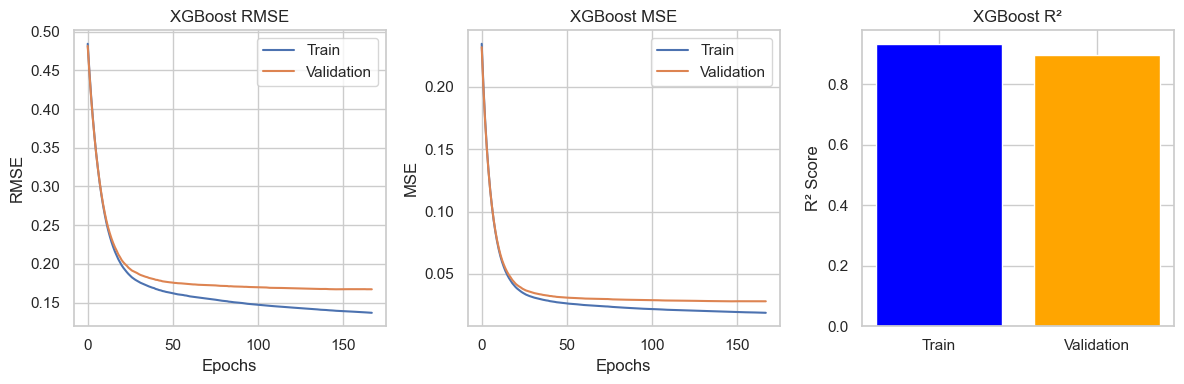

RMSE - Train: 0.1368, Validation: 0.1672
MSE  - Train: 0.018718, Validation: 0.027954
R²   - Train: 0.9320, Validation: 0.8972


c:\Users\andre\anaconda3\envs\compvis\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\andre\anaconda3\envs\compvis\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [29]:
# Ambil hasil evaluasi dari training history
results = evals_result  # ini langsung dictionary
epochs = len(results['train']['rmse']) if 'train' in results else len(results['validation_0']['rmse'])
x_axis = range(epochs)

# Plot RMSE
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(x_axis, results['train']['rmse'] if 'train' in results else results['validation_0']['rmse'], label='Train')
plt.plot(x_axis, results['val']['rmse'] if 'val' in results else results['validation_1']['rmse'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('XGBoost RMSE')
plt.legend()

# Plot MSE
plt.subplot(1, 3, 2)
plt.plot(x_axis, np.array(results['train']['rmse'])**2 if 'train' in results else np.array(results['validation_0']['rmse'])**2, label='Train')
plt.plot(x_axis, np.array(results['val']['rmse'])**2 if 'val' in results else np.array(results['validation_1']['rmse'])**2, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('XGBoost MSE')
plt.legend()

# Hitung R² Score
y_pred_train = model_xgb.predict(dtrain)
y_pred_val = model_xgb.predict(dval)
r2_train = r2_score(y_train, y_pred_train)
r2_val = r2_score(y_val, y_pred_val)

plt.subplot(1, 3, 3)
plt.bar(['Train', 'Validation'], [r2_train, r2_val], color=['blue', 'orange'])
plt.ylabel('R² Score')
plt.title('XGBoost R²')

plt.tight_layout()
plt.show()

# Hitung kembali RMSE dan MSE
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_val = mean_squared_error(y_val, y_pred_val, squared=False)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_val = mean_squared_error(y_val, y_pred_val)

# Cetak hasil
print(f"RMSE - Train: {rmse_train:.4f}, Validation: {rmse_val:.4f}")
print(f"MSE  - Train: {mse_train:.6f}, Validation: {mse_val:.6f}")
print(f"R²   - Train: {r2_train:.4f}, Validation: {r2_val:.4f}")

In [30]:
dtest = xgb.DMatrix(X_test_xgb)

# === 3. Load model yang sudah disimpan ===
model_xgb = xgb.Booster()
model_xgb.load_model("xgb_model.json")  # Pastikan file ini ada di folder yang sama

# === 4. Prediksi nilai harga rumah ===
y_pred_test = model_xgb.predict(dtest)

# === 5. Hitung metrik evaluasi ===
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# === 6. Tampilkan hasil metrik ===
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Test MSE : {mse_test:.6f}")
print(f"Test R²  : {r2_test:.4f}")

# === 7. Simpan hasil prediksi ke CSV ===
result_df = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_pred_test
})

# Simpan ke file
result_df.to_csv("xgb_test_results.csv", index=False)
print("Hasil prediksi test disimpan di 'xgb_test_results.csv'")

Test RMSE: 0.1630
Test MSE : 0.026565
Test R²  : 0.9108
Hasil prediksi test disimpan di 'xgb_test_results.csv'


c:\Users\andre\anaconda3\envs\compvis\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<h1>LightGBM

In [31]:
import lightgbm as lgb
# Hapus kolom zipcode_price_tier
X_train_lgb = X_train.drop(columns=['zipcode_price_tier'])
X_val_lgb = X_val.drop(columns=['zipcode_price_tier'])
X_test_lgb = X_test.drop(columns=['zipcode_price_tier'])

# Buat Dataset LightGBM
dtrain_lgb = lgb.Dataset(X_train_lgb, label=y_train)
dval_lgb = lgb.Dataset(X_val_lgb, label=y_val, reference=dtrain_lgb)

In [32]:
params_lgb = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'max_depth': 5,
    'verbose': -1,
    'seed': 42
}

#Training LightGBM Model
evals_result_lgb = {}

model_lgb = lgb.train(
    params=params_lgb,
    train_set=dtrain_lgb,
    num_boost_round=200,
    valid_sets=[dtrain_lgb, dval_lgb],
    valid_names=['train', 'val'],
    callbacks=[
        lgb.early_stopping(stopping_rounds=20),
        lgb.record_evaluation(evals_result_lgb),
        lgb.log_evaluation(period=10)  
    ]
)

# --- 4. Save Model and Evals Result ---
model_lgb.save_model("lgb_model.txt")

with open("lgb_evals_result.pkl", "wb") as f:
    pickle.dump(evals_result_lgb, f)

print("Model LightGBM dan evals_result berhasil disimpan.")

Training until validation scores don't improve for 20 rounds
[10]	train's rmse: 0.275897	val's rmse: 0.277629
[20]	train's rmse: 0.201662	val's rmse: 0.207174
[30]	train's rmse: 0.178343	val's rmse: 0.186465
[40]	train's rmse: 0.169094	val's rmse: 0.179263
[50]	train's rmse: 0.163985	val's rmse: 0.175583
[60]	train's rmse: 0.160723	val's rmse: 0.173651
[70]	train's rmse: 0.157879	val's rmse: 0.17253
[80]	train's rmse: 0.155774	val's rmse: 0.171559
[90]	train's rmse: 0.153495	val's rmse: 0.170342
[100]	train's rmse: 0.1515	val's rmse: 0.169192
[110]	train's rmse: 0.14998	val's rmse: 0.168327
[120]	train's rmse: 0.148742	val's rmse: 0.167862
[130]	train's rmse: 0.147341	val's rmse: 0.167541
[140]	train's rmse: 0.146015	val's rmse: 0.167048
[150]	train's rmse: 0.144881	val's rmse: 0.166852
[160]	train's rmse: 0.143468	val's rmse: 0.16659
[170]	train's rmse: 0.142323	val's rmse: 0.16657
[180]	train's rmse: 0.141347	val's rmse: 0.166512
[190]	train's rmse: 0.140452	val's rmse: 0.166329
[200

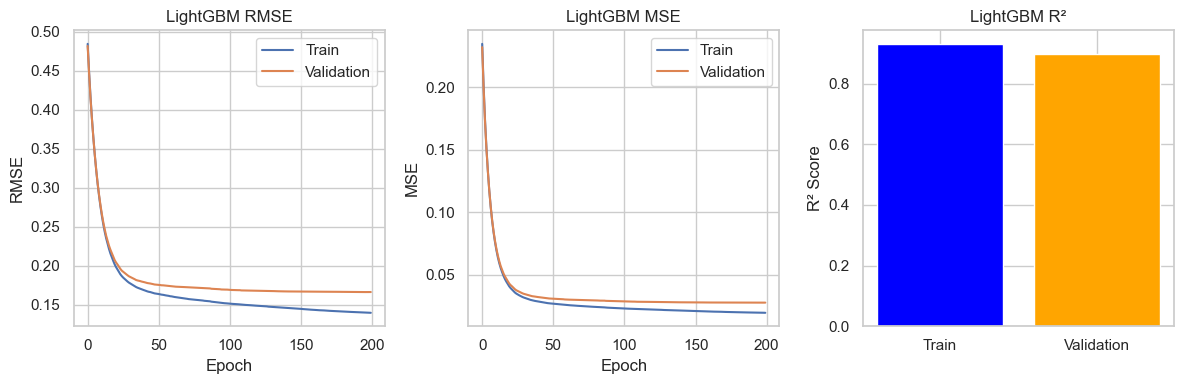

RMSE - Train     : 0.1398
RMSE - Validation: 0.1662
MSE  - Train     : 0.019546
MSE  - Validation: 0.027636
R²   - Train     : 0.9290
R²   - Validation: 0.8984

=== Evaluation on Test Set ===
RMSE - Test: 0.1629
MSE  - Test: 0.026523
R²   - Test: 0.9110
Hasil prediksi test LightGBM disimpan di 'lgb_test_results.csv'


c:\Users\andre\anaconda3\envs\compvis\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\andre\anaconda3\envs\compvis\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\andre\anaconda3\envs\compvis\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [33]:
epochs = len(evals_result_lgb['train']['rmse'])
x_axis = range(epochs)

plt.figure(figsize=(12, 4))

# RMSE
plt.subplot(1, 3, 1)
plt.plot(x_axis, evals_result_lgb['train']['rmse'], label='Train')
plt.plot(x_axis, evals_result_lgb['val']['rmse'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('LightGBM RMSE')
plt.legend()

# MSE
plt.subplot(1, 3, 2)
plt.plot(x_axis, np.array(evals_result_lgb['train']['rmse'])**2, label='Train')
plt.plot(x_axis, np.array(evals_result_lgb['val']['rmse'])**2, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('LightGBM MSE')
plt.legend()

# R² Score
y_pred_train_lgb = model_lgb.predict(X_train_lgb, num_iteration=model_lgb.best_iteration)
y_pred_val_lgb = model_lgb.predict(X_val_lgb, num_iteration=model_lgb.best_iteration)
r2_train = r2_score(y_train, y_pred_train_lgb)
r2_val = r2_score(y_val, y_pred_val_lgb)

plt.subplot(1, 3, 3)
plt.bar(['Train', 'Validation'], [r2_train, r2_val], color=['blue', 'orange'])
plt.ylabel('R² Score')
plt.title('LightGBM R²')

plt.tight_layout()
plt.show()

# --- 6. Evaluasi Angka Train dan Validation ---
rmse_train = mean_squared_error(y_train, y_pred_train_lgb, squared=False)
rmse_val = mean_squared_error(y_val, y_pred_val_lgb, squared=False)
mse_train = mean_squared_error(y_train, y_pred_train_lgb)
mse_val = mean_squared_error(y_val, y_pred_val_lgb)

print(f"RMSE - Train     : {rmse_train:.4f}")
print(f"RMSE - Validation: {rmse_val:.4f}")
print(f"MSE  - Train     : {mse_train:.6f}")
print(f"MSE  - Validation: {mse_val:.6f}")
print(f"R²   - Train     : {r2_train:.4f}")
print(f"R²   - Validation: {r2_val:.4f}")

# --- 7. Testing LightGBM Model ---
y_pred_test_lgb = model_lgb.predict(X_test_lgb, num_iteration=model_lgb.best_iteration)

# Hitung metric
rmse_test = mean_squared_error(y_test, y_pred_test_lgb, squared=False)
mse_test = mean_squared_error(y_test, y_pred_test_lgb)
r2_test = r2_score(y_test, y_pred_test_lgb)

print(f"\n=== Evaluation on Test Set ===")
print(f"RMSE - Test: {rmse_test:.4f}")
print(f"MSE  - Test: {mse_test:.6f}")
print(f"R²   - Test: {r2_test:.4f}")

# --- 8. Save Test Prediction Results ---
result_test_lgb = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_pred_test_lgb
})
result_test_lgb.to_csv("lgb_test_results.csv", index=False)
print("Hasil prediksi test LightGBM disimpan di 'lgb_test_results.csv'")

<h1>CatBoost

In [34]:
from catboost import CatBoostRegressor, Pool

X_train_cat = X_train.drop(columns=['zipcode_price_tier'])
X_val_cat = X_val.drop(columns=['zipcode_price_tier'])
X_test_cat = X_test.drop(columns=['zipcode_price_tier'])


dtrain_cat = Pool(data=X_train_cat, label=y_train)
dval_cat = Pool(data=X_val_cat, label=y_val)


model_cat = CatBoostRegressor(
    iterations=200,
    depth=5,
    learning_rate=0.1,
    loss_function='RMSE',
    random_seed=42,
    early_stopping_rounds=20,
    verbose=10
)


model_cat.fit(
    dtrain_cat,
    eval_set=dval_cat,
    use_best_model=True,
    plot=True
)


model_cat.save_model("cat_model.cbm")


evals_result_cat = model_cat.get_evals_result()

with open("cat_evals_result.pkl", "wb") as f:
    pickle.dump(evals_result_cat, f)

print(" Model CatBoost dan evals_result berhasil disimpan.")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.4889614	test: 0.4861491	best: 0.4861491 (0)	total: 4.07ms	remaining: 810ms
10:	learn: 0.2914155	test: 0.2901527	best: 0.2901527 (10)	total: 45.6ms	remaining: 784ms
20:	learn: 0.2302928	test: 0.2295444	best: 0.2295444 (20)	total: 108ms	remaining: 919ms
30:	learn: 0.2062963	test: 0.2066936	best: 0.2066936 (30)	total: 149ms	remaining: 811ms
40:	learn: 0.1945485	test: 0.1958610	best: 0.1958610 (40)	total: 199ms	remaining: 772ms
50:	learn: 0.1879209	test: 0.1894024	best: 0.1894024 (50)	total: 239ms	remaining: 697ms
60:	learn: 0.1830149	test: 0.1847208	best: 0.1847208 (60)	total: 279ms	remaining: 637ms
70:	learn: 0.1794788	test: 0.1813632	best: 0.1813632 (70)	total: 320ms	remaining: 581ms
80:	learn: 0.1765767	test: 0.1788553	best: 0.1788553 (80)	total: 356ms	remaining: 522ms
90:	learn: 0.1739753	test: 0.1765909	best: 0.1765909 (90)	total: 387ms	remaining: 464ms
100:	learn: 0.1719010	test: 0.1750172	best: 0.1750172 (100)	total: 421ms	remaining: 413ms
110:	learn: 0.1700273	test: 0.

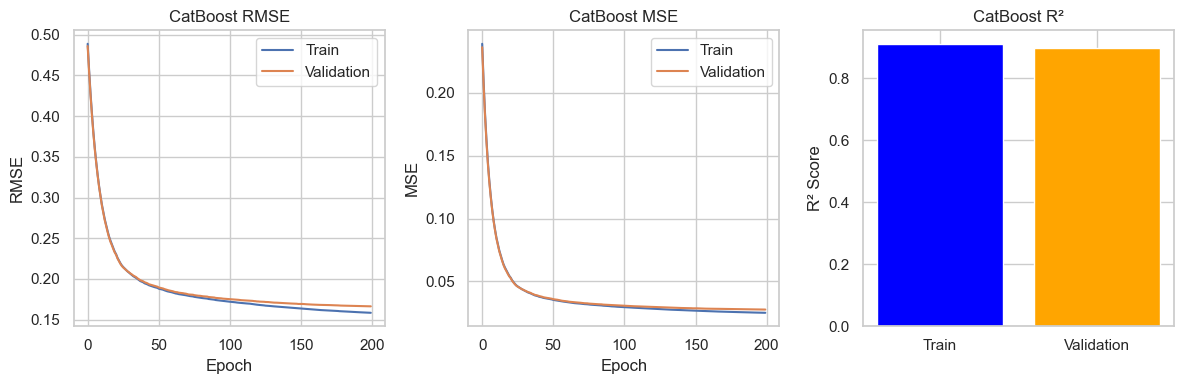

RMSE - Train     : 0.1583
RMSE - Validation: 0.1662
MSE  - Train     : 0.025058
MSE  - Validation: 0.027637
R²   - Train     : 0.9090
R²   - Validation: 0.8984


c:\Users\andre\anaconda3\envs\compvis\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\andre\anaconda3\envs\compvis\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [35]:
# --- 5. Visualisasi Learning Curve ---

# Ambil RMSE train dan val
train_rmse = evals_result_cat['learn']['RMSE']
val_rmse = evals_result_cat['validation']['RMSE']
epochs = len(train_rmse)
x_axis = range(epochs)

plt.figure(figsize=(12, 4))

# Plot RMSE
plt.subplot(1, 3, 1)
plt.plot(x_axis, train_rmse, label='Train')
plt.plot(x_axis, val_rmse, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('CatBoost RMSE')
plt.legend()

# Plot MSE
plt.subplot(1, 3, 2)
plt.plot(x_axis, np.array(train_rmse)**2, label='Train')
plt.plot(x_axis, np.array(val_rmse)**2, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('CatBoost MSE')
plt.legend()

# R² Score
y_pred_train_cat = model_cat.predict(X_train_cat)
y_pred_val_cat = model_cat.predict(X_val_cat)
r2_train = r2_score(y_train, y_pred_train_cat)
r2_val = r2_score(y_val, y_pred_val_cat)

plt.subplot(1, 3, 3)
plt.bar(['Train', 'Validation'], [r2_train, r2_val], color=['blue', 'orange'])
plt.ylabel('R² Score')
plt.title('CatBoost R²')

plt.tight_layout()
plt.show()

# --- 6. Evaluasi Angka Train dan Validation ---
rmse_train = mean_squared_error(y_train, y_pred_train_cat, squared=False)
rmse_val = mean_squared_error(y_val, y_pred_val_cat, squared=False)
mse_train = mean_squared_error(y_train, y_pred_train_cat)
mse_val = mean_squared_error(y_val, y_pred_val_cat)

print(f"RMSE - Train     : {rmse_train:.4f}")
print(f"RMSE - Validation: {rmse_val:.4f}")
print(f"MSE  - Train     : {mse_train:.6f}")
print(f"MSE  - Validation: {mse_val:.6f}")
print(f"R²   - Train     : {r2_train:.4f}")
print(f"R²   - Validation: {r2_val:.4f}")

In [36]:
# --- 7. Testing CatBoost Model ---
y_pred_test_cat = model_cat.predict(X_test_cat)

# Hitung metric
rmse_test = mean_squared_error(y_test, y_pred_test_cat, squared=False)
mse_test = mean_squared_error(y_test, y_pred_test_cat)
r2_test = r2_score(y_test, y_pred_test_cat)

print(f"\n=== Evaluation on Test Set ===")
print(f"RMSE - Test: {rmse_test:.4f}")
print(f"MSE  - Test: {mse_test:.6f}")
print(f"R²   - Test: {r2_test:.4f}")

# --- 8. Save Test Prediction Results ---
result_test_cat = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_pred_test_cat
})
result_test_cat.to_csv("cat_test_results.csv", index=False)
print("Hasil prediksi test CatBoost disimpan di 'cat_test_results.csv'")


=== Evaluation on Test Set ===
RMSE - Test: 0.1684
MSE  - Test: 0.028361
R²   - Test: 0.9048
Hasil prediksi test CatBoost disimpan di 'cat_test_results.csv'


c:\Users\andre\anaconda3\envs\compvis\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
